In [1]:
import gymnasium 
import numpy as np
import matplotlib.pyplot as plt
#import time
import CoppeliaSim_Gym # entorno
import stable_baselines3
# print(f"{gymnasium.__version__=}")
from stable_baselines3.common.env_checker import check_env # verificar el entorno

In [2]:
ENV_NAME = "CoppeliaSim_Gym/GymCoppManR-v0"
env = gymnasium.make(ENV_NAME) 
#check_env(env, warn=True) # si funciona

Conectado al servidor API remoto


In [3]:
print("Espacio de observacion:", env.observation_space)
print("Shape Obs:", env.observation_space.shape) 
print("tipo de observacion:", env.observation_space.dtype) 
#print("Sample Obs:", env.observation_space.sample())
print("Espacio de accion:", env.action_space)
print(env.joint_angles())
print("Action space sample:", env.action_space.sample())
print("Estado:", env.estado())
print('dist', env.distance_to_goal())
env.grafica()

Espacio de observacion: Box(-180.0, 180.0, (18,), float32)
Shape Obs: (18,)
tipo de observacion: float32
Espacio de accion: Box(-1.0, 1.0, (7,), float32)
[-9.0841260e-03  2.4149990e-01  0.0000000e+00 -9.0043625e+01
 -5.8579701e-03  8.9997192e+01 -5.0888875e-14]
Action space sample: [-0.40543395 -0.9933915   0.99530244 -0.4961118  -0.51608753  0.0989138
  0.9456698 ]
Estado: [1.0553489e+00 7.9770666e-04 5.0776106e-01 0.0000000e+00 1.0000000e+00
 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
 0.0000000e+00 1.0000000e+00 4.6979219e-01]
dist 0.4697922


NameError: name 'action' is not defined

Contador:  1
Distancia previa : 0.600 m
Distancia actual: 0.722 m
Recompensa Distancia: -0.722
Recompensa Costo: -0.26068983078002933
Recompensa diferencia: -0.122
Recompensa llegada: 0.0
El efector y el objeto no están colisionando
El efector y el objeto no están colisionando
Recompensa Colision: 0.0
Recompensa Total:  -0.9822594973132053
--------------------------------------------------------------------
Episode: 0 Score: 0
Contador:  2
Distancia previa : 0.722 m
Distancia actual: 0.724 m
Recompensa Distancia: -0.724
Recompensa Costo: -0.10517535209655762
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
El efector y el objeto no están colisionando
El efector y el objeto no están colisionando
Recompensa Colision: 0.0
Recompensa Total:  -0.8290843853824739
--------------------------------------------------------------------
Episode: 1 Score: 0
Contador:  3
Distancia previa : 0.724 m
Distancia actual: 0.719 m
Recompensa Distancia: -0.719
Recompensa Costo: -0.2368170499801636
Recom

Distancia previa : 0.735 m
Distancia actual: 0.744 m
Recompensa Distancia: -0.744
Recompensa Costo: -0.19268964529037477
Recompensa diferencia: -0.009
Recompensa llegada: 0.0
El efector y el objeto no están colisionando
El efector y el objeto no están colisionando
Recompensa Colision: 0.0
Recompensa Total:  -0.9365768835104904
--------------------------------------------------------------------
Episode: 19 Score: 0
Contador:  21
Distancia previa : 0.744 m
Distancia actual: 0.749 m
Recompensa Distancia: -0.749
Recompensa Costo: -0.10593172311782838
Recompensa diferencia: -0.005
Recompensa llegada: 0.0
El efector y el objeto no están colisionando
El efector y el objeto no están colisionando
Recompensa Colision: 0.0
Recompensa Total:  -0.8546161051772254
--------------------------------------------------------------------
Episode: 20 Score: 0
Contador:  22
Distancia previa : 0.749 m
Distancia actual: 0.760 m
Recompensa Distancia: -0.760
Recompensa Costo: -0.281491494178772
Recompensa dife

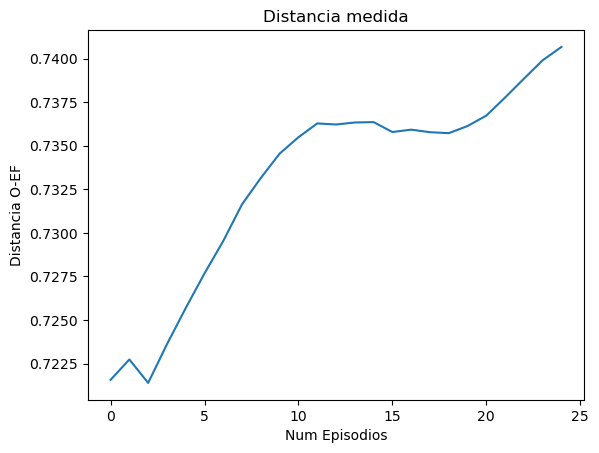

In [4]:
# Evaluar sistema con acciones aleatorias
acc=[]
X_ = []
Y_ = []
env.reset()
for episode in range(25):
    env.render()
    # toma una accion aleatoria
    env.step(env.action_space.sample()) 
    score = env.comp_reward()
    print(f'Episode: {episode} Score: {score}')
    #time.sleep(5)
    acc += [env.distance_to_goal()]
    X_.append(episode)
    Y_.append(np.array(acc).mean())
plt.plot(X_, Y_)
plt.title('Distancia medida')
plt.xlabel('Num Episodios')
plt.ylabel('Distancia O-EF')
plt.show()
env.close()